미국 인구 조사국에서 수집한 보스턴 시의 주택가격에 대한 데이터를 통해 주택의 가격에 영향을 미치는 인자를 분석한다.

다양한 에측 모델을 이용하여 집값에 영향을 주는 영향인자를 객관적으로 도출하고, 선정한 영향인자를 활용하여
집값을 예측하라.

**잠재적인 인자 도출
 부동산 전문가들이 뽑은 부동산 가격에 영향을 미치는 4대요인 ( 교통,교육,상권,환경)
 을 이용하여 다음과 같은 잠재적 원인을 도출

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import numpy as np
import graphviz
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
#회귀분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
#선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
#평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
# 주피터 사용시 그래프자동출력 옵션
matplotlib.rc('font', family ='Malgun Gothic')
#통계 패키지
import math
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf # 선형모델 formula(y ~ x1 +x2+ x3)
import statsmodels.api as sm
# ols Ordinary Least Squares (최소자승법 라이브러리)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#데이터 sacling
from sklearn.preprocessing import StandardScaler

#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

MEDV 	주택가격
CRIM 	1인당 범죄율
ZN 	주거지 비율
INDUS 	비주거 상업 지역 비율
CHAS 	강조망 (1조망 0 비조망) 
NOX 	산화 질소 농도
RM 	가구당 평균방수 
AGE 	자기 소유 집 비율
DIS 	중심지 접근 거리
RAD 	방사형 도로 접근성 지수
TAX 	재산세율
PTRATIO 	학생교사 비율
B 	흑인비율
LSTAT 저소득층 비율

#가설6: 자기 소유 집 비율(1940이전)이 높으면 주택가격이 높을 것이다.
#가설7: 가구당 평균 방 수가 많으면 주택가격이 높을 것이다.
#가설8: 중심지(직업센터) 접근 거리가 가까울수록 주택가격이 높을 것이다.
#가설11: 학생/교사 비율이 낮을수록 주택가격이 높을 것이다.
#가설12: 흑인 인구 비율이 낮을수록 주택가격이 높을 것이다.

목차 과제정의
가설설정
데이터처리
EDA
모델링
분석결론
소감
# 네가지 요소를 비교해서 서울과 보스턴에 연관된 인자



# 가설 설정!

*가설8: 중심지(직업센터) 접근 거리가 가까울수록 주택가격이 높을 것이다.
*가설6: 자기 소유 집 비율(1940이전)이 높으면 주택가격이 높을 것이다.
*가설7: 가구당 평균 방 수가 많으면 주택가격이 높을 것이다.

*가설11: 학생/교사 비율이 낮을수록 주택가격이 높을 것이다.
*가설12: 흑인 인구 비율이 낮을수록 주택가격이 높을 것이다.


In [2]:
df_raw =pd.read_csv(r'/home/piai/test/test2/currentwork/BOSTON_HOUSING.csv', engine='python')
df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


# 데이터 전처리

In [3]:
#결측처리
df_raw.isnull().sum()
# 결측치 없음.

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [4]:
# 데이터 내 목표변수 및 설명 변수 타입확인
df_raw.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [5]:
# 연속형 변수, 범주형 변수 구분 
df_raw1_numeric=df_raw.select_dtypes(exclude='object')
df_raw1_object=df_raw.select_dtypes(include='object')

In [33]:
#데이터 표준화하기 
df_raw1.info()

scaler = StandardScaler()
df_raw1 = scaler.fit_transform(df_raw1_numeric)
df_raw1 = pd.DataFrame(df_raw1, columns=df_raw.columns)
df_raw1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    float64
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    float64
 10  TAX      506 non-null    float64
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.159686,-0.419782,0.284830,-1.287910,-0.272599,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.101524,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303095,0.441052,-0.492439
2,1.324247,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303095,0.396427,-1.208727
3,1.182758,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.487503,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


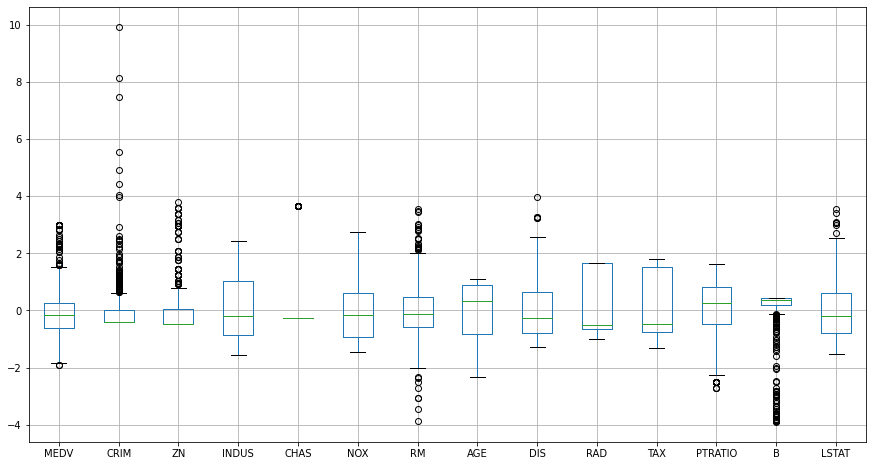

In [7]:
# 이상치 제거
df_raw1.boxplot(figsize=(15,8))


In [8]:
# CRIM과 B 설명변 수 이상치 존재
# CRIM은 연속되지 않는 지점까지 삭제
# B의 이상치는 연속성을 띄므로 삭제하지 않음.

In [9]:
# CRIM 이상치 제거 
df_raw=df_raw.drop([380,418,405,410,414,404,398,427])

In [10]:
#  기술통계량확인 
df_raw1.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.381526e-17,-7.438055e-17,3.306534e-16,-4.666338e-16,-3.100287e-16,-1.217735e-15,6.320153e-16,-3.145266e-16,-3.335057e-17,1.514379e-15,-9.934960e-16,-7.029950e-16,4.049242e-16,1.015876e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-1.908226e+00,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-5.994557e-01,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686300e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880394e-01,2.050714e-01,-7.994200e-01
50%,-1.450592e-01,-3.906665e-01,-4.877224e-01,-2.110986e-01,-2.725986e-01,-1.442175e-01,-1.084653e-01,3.173816e-01,-2.793235e-01,-5.230014e-01,-4.646726e-01,2.748589e-01,3.811866e-01,-1.812535e-01
75%,2.685231e-01,7.396564e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986791e-01,4.827678e-01,9.067981e-01,6.623710e-01,1.661245e+00,1.530926e+00,8.065760e-01,4.336511e-01,6.030187e-01
max,2.989460e+00,9.933930e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


# pairplot으로  전체변수간 상관관계 조사 

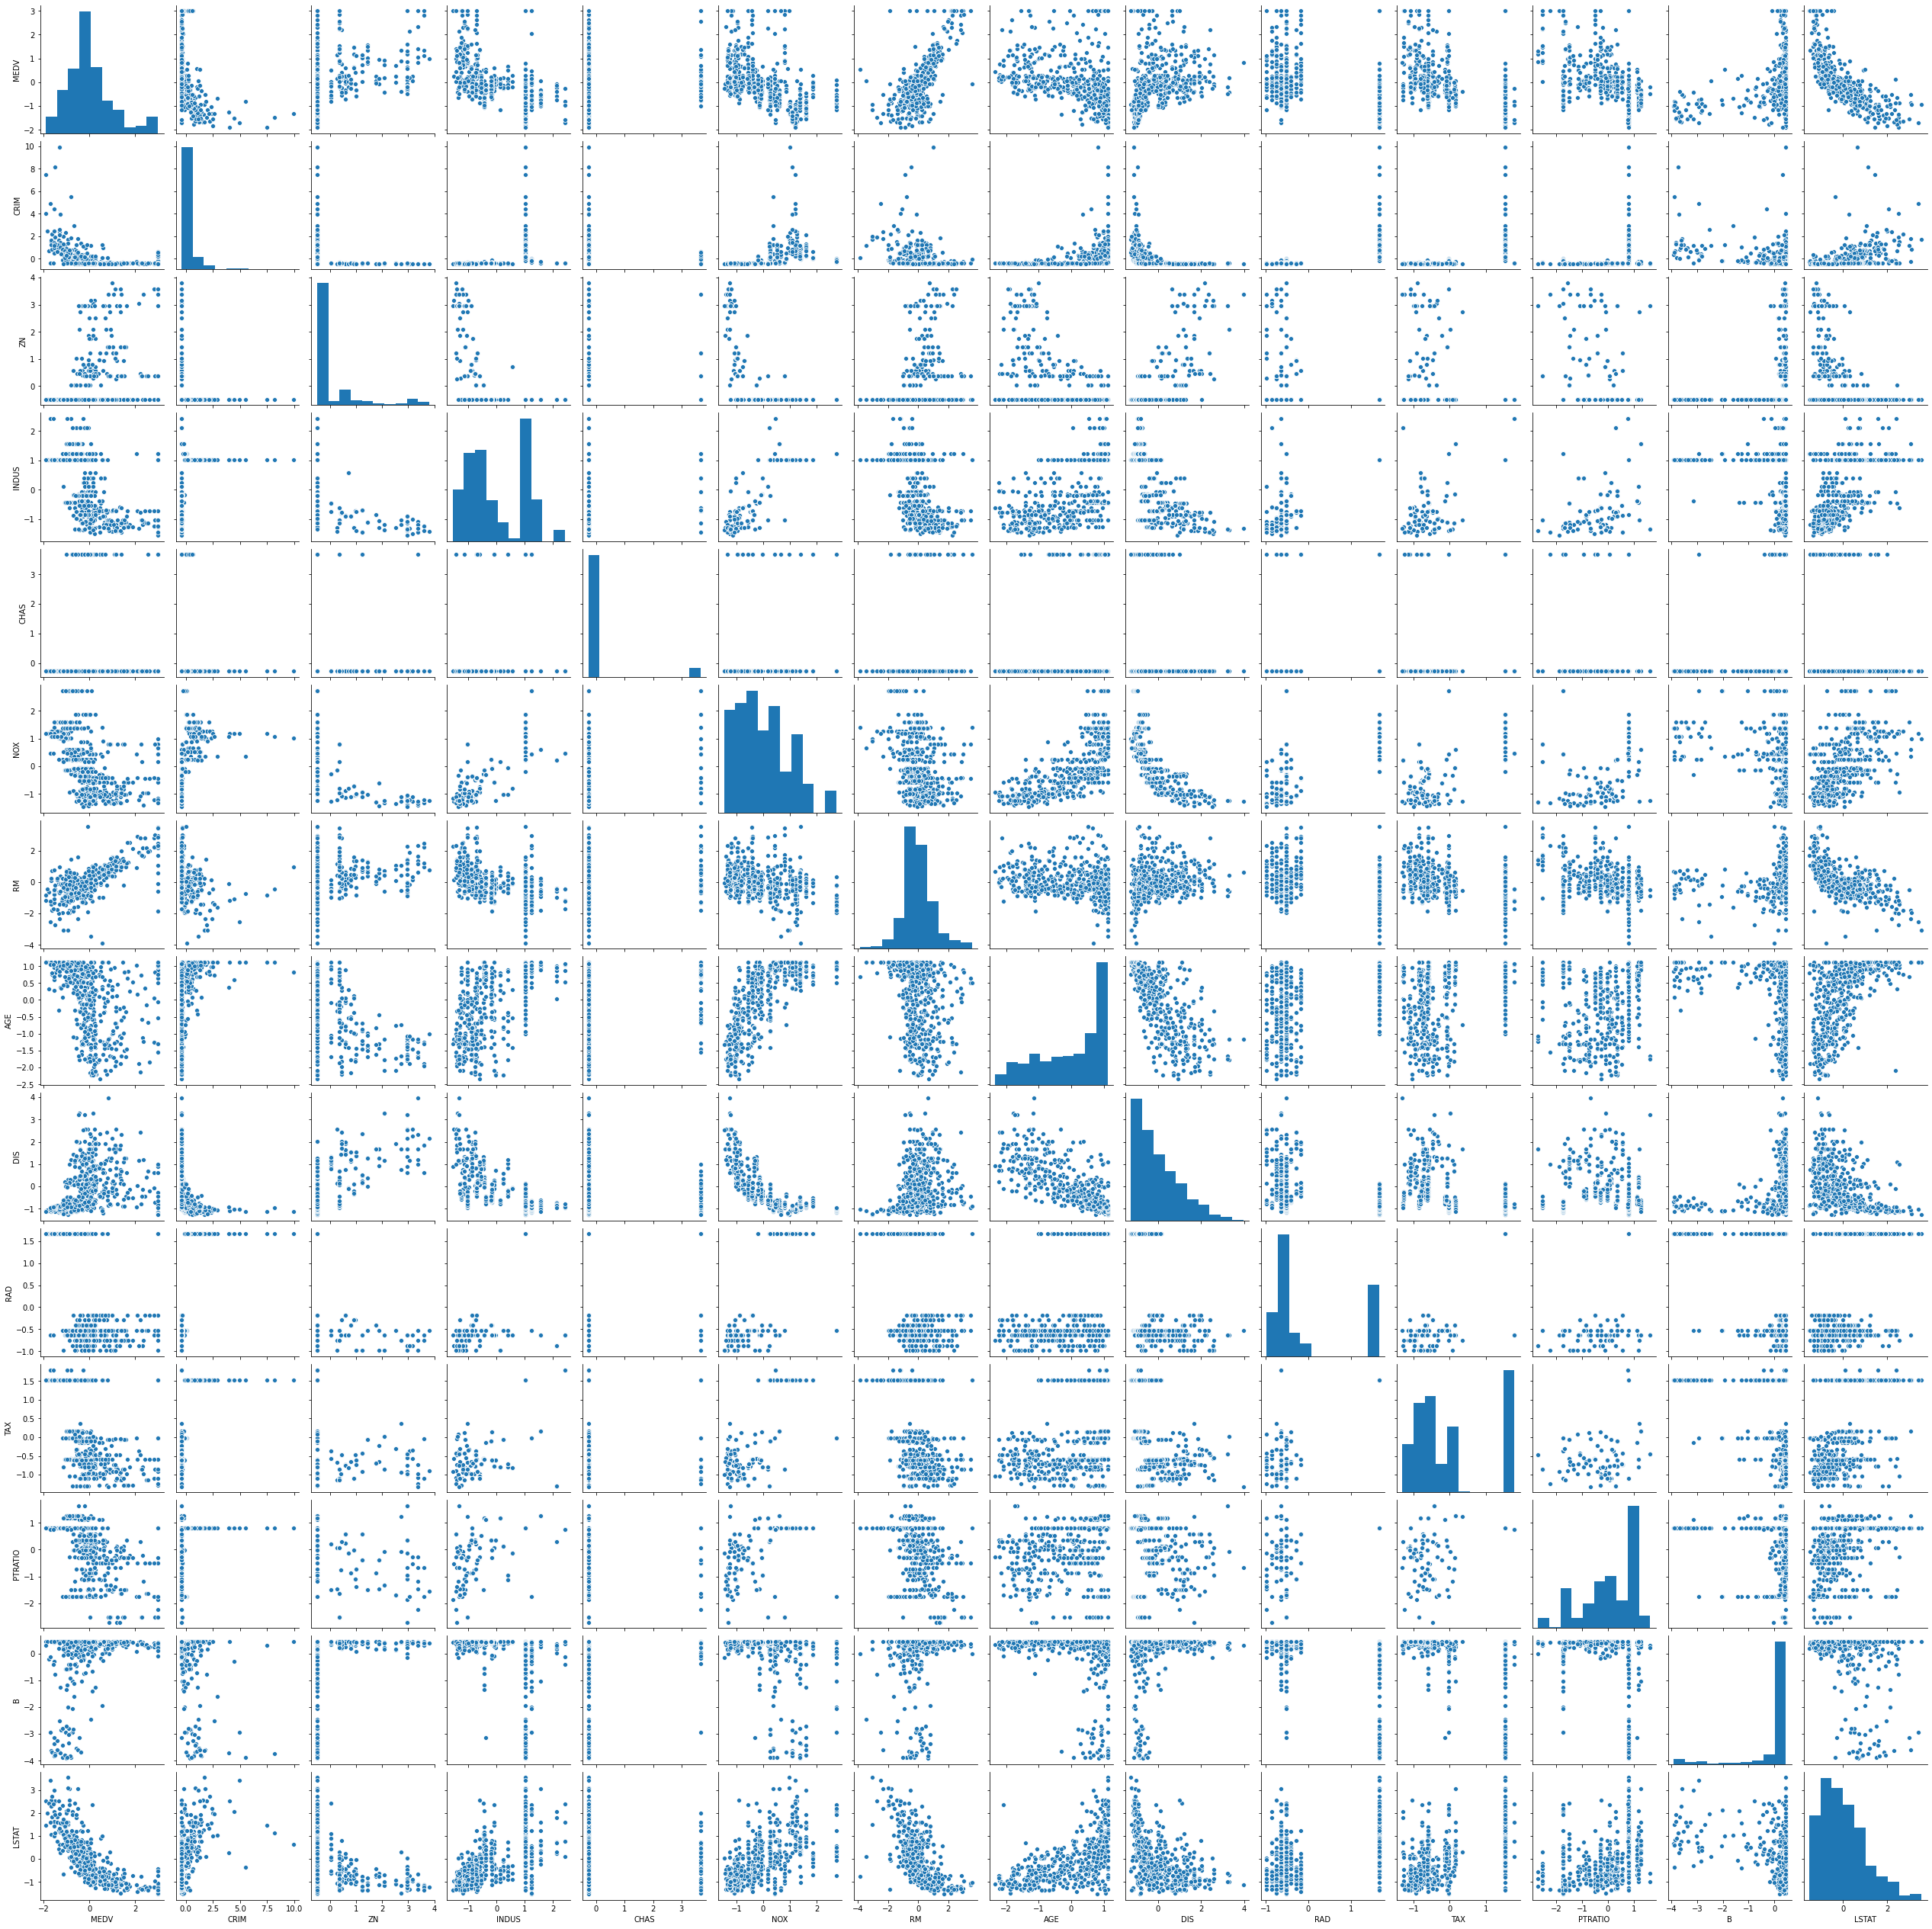

In [34]:
sns.pairplot(df_raw1)

In [11]:
# 전체 변수 상관관계 파악
a= df_raw1.corr().round(3)
a

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


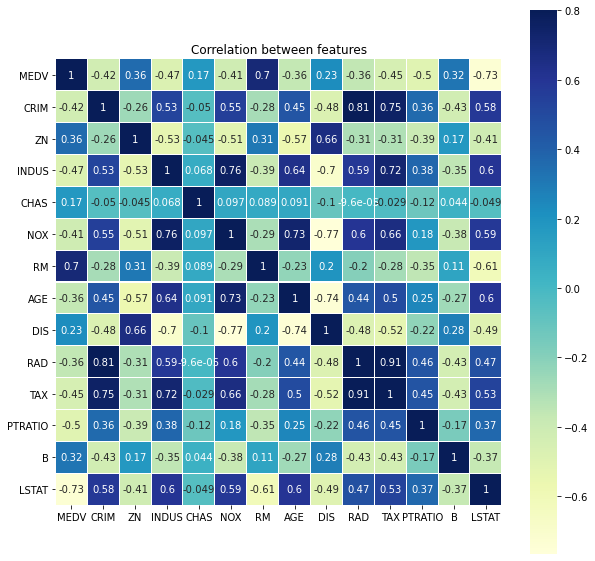

In [12]:
# heatmap을 활용한 상관관계 파악 
corr=df_raw.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');




*가설8: 중심지(직업센터) 접근 거리가 가까울수록 주택가격이 높을 것이다.
*가설6: 자기 소유 집 비율(1940이전)이 높으면 주택가격이 높을 것이다.GE 자기 소유 집
*가설7: 가구당 평균 방 수가 많으면 주택가격이 높을 것이다.

*가설11: 학생/교사 비율이 낮을수록 주택가격이 높을 것이다.
*가설12: 흑인 인구 비율이 낮을수록 주택가격이 높을 것이다.

가설검정 1
*가설8: 중심지(직업센터) 접근 거리가 가까울수록 주택가격이 높을 것이다.
 산점도를 그려보니 엄청 약한 양의상관관계를 가지고있다.

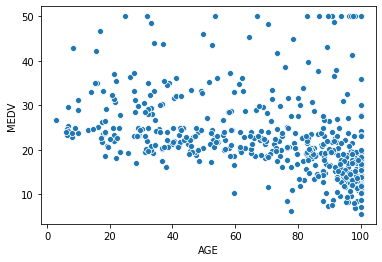

In [36]:

# scatter plot을 통한 상관관계 파악 
sns.scatterplot(x='AGE', y='MEDV',data=df_raw) 

In [35]:
*가설6: 자기 소유 집 비율(1940이전)이 높으면 주택가격이 높을 것이다.
    산점도를 그려보니 엄청 약한 음의상관관계를 가지고있다.

SyntaxError: invalid syntax (<ipython-input-35-1e595647e51e>, line 1)

In [ ]:
sns.scatterplot(x='AGE', y='MEDV',data=df_raw) 

*가설7: 가구당 평균 방 수가 많으면 주택가격이 높을 것이다.
   산점도를 그려보니 강한 양의 상관관계를 가지고있다.
   

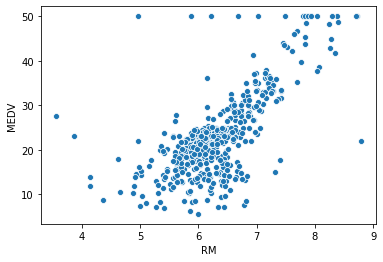

In [15]:
sns.scatterplot(x='RM', y='MEDV',data=df_raw) 

*가설11: 학생/교사 비율이 낮을수록 주택가격이 높을 것이다.
   산점도를 그려보니  음의 상관관계를 가지고있다.

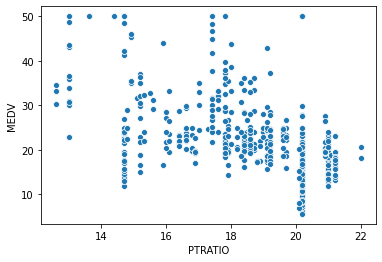

In [16]:
sns.scatterplot(x='PTRATIO', y='MEDV',data=df_raw) 

*가설12: 흑인 인구 비율이 낮을수록 주택가격이 높을 것이다.
산점도를 그려보니  약한 음의 상관관계를 가지고있다.
    

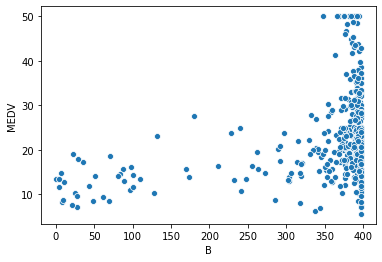

In [17]:
sns.scatterplot(x='B', y='MEDV',data=df_raw) 

In [18]:
# 회귀식 생성
formula = "MEDV ~ " + "+".join(df_raw1.columns[1:])
formula

'MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [19]:
# 회귀모델 생성 및 ANOVA 테이블 출력
reg_model = smf.ols(formula=formula, data=df_raw1)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          6.72e-135
Time:                        06:58:49   Log-Likelihood:                -376.55
No. Observations:                 506   AIC:                             781.1
Df Residuals:                     492   BIC:                             840.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.332e-17      0.023   2.76e-15      1.0

다중 회귀 결과
해당 회귀식은 r스퀘어 값이 0.741로 74%의 설명력을 가진다.
회귀모델의 p-value가 0.05보다 작으므로 해당 회귀식은 유의하다.
Durbin-Watson 값이 2에 가까우므로 잔차는 독립성을 가짐 
자크베라 검정의 p-value 값이 엄청작으므로 잔차는 정규성을가짐.


다중 회귀 분석이므로 다중공선성이 존재하는지 확인해야함
다중공선성 존재시, 회귀식의 설명력 약화


In [20]:
df_raw1_x = df_raw1.drop(["MEDV"], axis=1)

df_raw1_x_const = add_constant(df_raw1_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw1_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw1_x_const.values, i) for i in range(df_raw1_x_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
0,const,1.000
4,CHAS,1.074
12,B,1.349
1,CRIM,1.792
11,PTRATIO,1.799
6,RM,1.934
2,ZN,2.299
13,LSTAT,2.941
7,AGE,3.101
8,DIS,3.956


 다중공선성은 vif 값이 10이상일 경우 존재하는데 10이상의 값이 존재하지 않으므로 제거하지 않겠다.

해당 회귀식의 설명력은 아까의 회귀식보다 더떨어졌다.
회귀식의 설명력은 0.729이고
p-value가 0.05보다 낮으므로 회귀식은 유의하다.

Durbin-Watson 검정 값이 2에 가까우므로 잔차는 독립성을 가지고 있고,
자크베라 검정 값이 0.05보다 작으므로 잔차는 정규성을 띈다.



*후진제거법

In [23]:
df_raw1_y = df_raw1["MEDV"]

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=10).fit(df_raw1_x, df_raw1_y)

selected_cols = df_raw1_x.columns[rfe.support_]
removed_cols = df_raw1_x.columns[~rfe.support_]

print("selected: {}".format(selected_cols))
print("removed: {}".format(removed_cols))

selected: Index(['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')
removed: Index(['INDUS', 'CHAS', 'AGE'], dtype='object')


In [24]:
formula = "MEDV ~ " + "+".join(selected_cols)
formula

'MEDV ~ CRIM+ZN+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [25]:
rfe_reg_model = smf.ols(formula=formula, data=df_raw1)

rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     137.5
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          6.70e-136
Time:                        06:58:51   Log-Likelihood:                -381.74
No. Observations:                 506   AIC:                             785.5
Df Residuals:                     495   BIC:                             832.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.332e-17      0.023   2.74e-15      1.0

해당 회귀식은 73%의 설명력을 가지고 P-value가 0.05보다 작으므로 유의하다
옴니버스 검정의 pvalue가 0이므로 잔차는 정규성을 띄고 있고,
  Durbin-Watson 검정값이 2에가까우므로 잔차는 독립성을 띄고있다.
모든 설명 변수는 유의하므로 원하는 가설을 검증 할 수있다.

회귀식 
MEDV=6.332e-17- 0.1067*CRIM + 0.1160 *ZN -0.2075*NOX +0.2937*RM -0.3494*DIS+ 0.2987*RAD 
-0.2323*TAX -0.2303*PTRATIO  +0.0966*B -0.4100*LSTAT

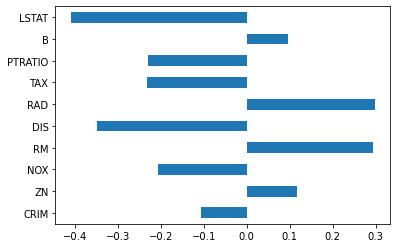

In [32]:

scaler = StandardScaler()
cols = df_raw1_x.columns

np_scaled = scaler.fit_transform(df_raw1_x)

df_scaled = pd.DataFrame(np_scaled, columns=cols)
df_scaled["MEDV"] = scaler.fit_transform(df_raw1[["MEDV"]])


df_reg_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index=selected_cols)
df_reg_coef.plot.barh(y="Coef", legend=False)

유의한 회귀식으로 가설을 검정해보면 

#가설6: 자기 소유 집 비율(1940이전)이 높으면 주택가격이 높을 것이다.
해당 가설은 후진제거법에서 설명변수가 소거되어 검정할 수 없지만, 
전체변수 다중회귀분석에서 상관계수가  0.0021로 집값과 상관관계가 거의없다. 
#가설7: 가구당 평균 방 수가 많으면 주택가격이 높을 것이다.
해당 가설은 집값과 유의한 상관계수 0.2937을 가지므로 참에 해당한다. 
#가설8: 중심지(직업센터) 접근 거리가 가까울수록 주택가격이 높을 것이다.
해당 가설은 목표변수와 유의한 상관계수가 -0.3494이므로 참에 해당한다.
#가설11: 학생/교사 비율이 낮을수록 주택가격이 높을 것이다.
해당가설은 목표변수와 유의한 상관계수가 -0.2303이므로 참에해당한다.
#가설12: 흑인 인구 비율이 낮을수록 주택가격이 높을 것이다.
해당가설은 목표변수와 유의한 상관계수 0.0966를 가지지만 이는 상관관계가 거의없음을 뜻하기때문에 
거짓이다.